# Agenda

- Part-I

  - Introduction of the tast

  - Scraping [Transfermarkt with BeautifulSoup](https://www.transfermarkt.com/)

- Part-II: Lab

  - Finishing the remaining part of the task. 
  - Creating the dataset and saving it.

# Part-I

## Introduction to the task

Today we will write some part of the code that can create Premier League Player's transfer record dataset. 


[Transfermarkt](https://www.transfermarkt.com/)

## Coding

In [5]:
## Recall that we used requests library and beautifulsoup library before 
import requests
from bs4 import BeautifulSoup

[User-Agents](https://www.whoishostingthis.com/tools/user-agent/)

- Getting TransferMarkt's main page



In [6]:
### This part will be done in class:

url = "https://www.transfermarkt.com/"

headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

response = requests.get(url, headers = headers, timeout = 5 )

print(response.status_code)

soup = BeautifulSoup(response.content, 'html.parser')



200


In [7]:
type(soup)

bs4.BeautifulSoup

In [8]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'HTML_FORMATTERS',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'XML_FORMATTERS',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_attr_value_as_string',
 '_attribute_checker',
 '_check_markup_is_url',
 '_feed',
 '_find_all',
 '_find_one',
 '_formatter_for_name',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_most_recent_element',
 '_popToTag',
 '_select_debug',
 '_selector_combinators',
 '_should_pretty_print',

- This time, let's try to get English Premier League's Page

In [9]:
## This part will be done in class


url = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1'

headers = {'User-Agent': 
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = requests.get(url, headers = headers, timeout = 5)

print(page.status_code)

soup = BeautifulSoup(page.content, 'html.parser')

200


In [10]:
soup.head

<head>
<script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.addEventListener("message", (function (e) { var t = "string" == typeof e.data,

### Deep Dive into the HTML code

__Q:__ We need to be able to get a team's link. What do we need to do?

[Link to Premier League](https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1)

In [11]:
len(soup.find_all('a'))

603

In [12]:
liverpool = soup.find_all('a', id = '31')

In [13]:
liverpool

[<a class="vereinprofil_tooltip" href="/fc-liverpool/startseite/verein/31/saison_id/2020" id="31">Liverpool FC</a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/startseite/verein/31/saison_id/2020" id="31">Liverpool</a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/spielplan/verein/31/saison_id/2020" id="31"><img alt="Liverpool FC" class="" src="https://tmssl.akamaized.net/images/wappen/homepage/31.png?lm=1456567819" title=" "/></a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/spielplan/verein/31/saison_id/2020" id="31">Liverpool</a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/spielplan/verein/31/saison_id/2020" id="31">Liverpool</a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/spielplan/verein/31/saison_id/2020" id="31"><img alt="Liverpool FC" class="" src="https://tmssl.akamaized.net/images/wappen/homepage/31.png?lm=1456567819" title=" "/></a>,
 <a class="vereinprofil_tooltip" href="/fc-liverpool/spielplan/verein/31/saison_id/2020" id="31">

In [14]:
len(liverpool)

15

In [15]:
table = soup.find_all('div', id = 'yw1')

In [16]:
len(table)

1

In [17]:
type(table)

bs4.element.ResultSet

In [18]:
tbody = table[0].find('table', class_ = 'items').tbody

In [19]:
tbody.find_all('td', class_ = "hauptlink no-border-links hide-for-small hide-for-pad")

[<td class="hauptlink no-border-links hide-for-small hide-for-pad"><a class="vereinprofil_tooltip" href="/manchester-city/startseite/verein/281/saison_id/2020" id="281">Manchester City</a> </td>,
 <td class="hauptlink no-border-links hide-for-small hide-for-pad"><a class="vereinprofil_tooltip" href="/fc-liverpool/startseite/verein/31/saison_id/2020" id="31">Liverpool FC</a> <a href="#"><img alt="English Champion 19/20" class="tabelle-erfolg" src="https://tmssl.akamaized.net/images/erfolge/mini/12.png?lm=1520606997" title="English Champion 19/20"/></a></td>,
 <td class="hauptlink no-border-links hide-for-small hide-for-pad"><a class="vereinprofil_tooltip" href="/fc-chelsea/startseite/verein/631/saison_id/2020" id="631">Chelsea FC</a> </td>,
 <td class="hauptlink no-border-links hide-for-small hide-for-pad"><a class="vereinprofil_tooltip" href="/manchester-united/startseite/verein/985/saison_id/2020" id="985">Manchester United</a> </td>,
 <td class="hauptlink no-border-links hide-for-sma

In [20]:
## discuss how can we progress in html tree to access links

url = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1'

headers = {'User-Agent': 
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = requests.get(url, headers = headers, timeout = 5)

print(page.status_code)

soup = BeautifulSoup(page.content, 'html.parser')

200


In [21]:
## We realized that the table we are looking for has
## 'div' tag and id = 'yw1'
## And we experimented with this and realized that there is only one such table

table = soup.find('div', {'id': 'yw1'})

table_items = table.find('table', class_ = 'items')

tbody = table_items.findChild('tbody')

cells = tbody.find_all('td', class_ = "hauptlink no-border-links hide-for-small hide-for-pad")

for cell in cells:
  print(cell.text)
  print(cell.a.get('href'))

Manchester City 
/manchester-city/startseite/verein/281/saison_id/2020
Liverpool FC 
/fc-liverpool/startseite/verein/31/saison_id/2020
Chelsea FC 
/fc-chelsea/startseite/verein/631/saison_id/2020
Manchester United 
/manchester-united/startseite/verein/985/saison_id/2020
Tottenham Hotspur 
/tottenham-hotspur/startseite/verein/148/saison_id/2020
Arsenal FC 
/fc-arsenal/startseite/verein/11/saison_id/2020
Leicester City 
/leicester-city/startseite/verein/1003/saison_id/2020
Everton FC 
/fc-everton/startseite/verein/29/saison_id/2020
Wolverhampton Wanderers 
/wolverhampton-wanderers/startseite/verein/543/saison_id/2020
Aston Villa 
/aston-villa/startseite/verein/405/saison_id/2020
West Ham United 
/west-ham-united/startseite/verein/379/saison_id/2020
Brighton & Hove Albion 
/brighton-amp-hove-albion/startseite/verein/1237/saison_id/2020
Newcastle United 
/newcastle-united/startseite/verein/762/saison_id/2020
Southampton FC 
/fc-southampton/startseite/verein/180/saison_id/2020
Fulham FC  
/

In [22]:
## Note that find_all will return a list.
## if there is no match then the list will be empty list
## Find table with class = 'items' save it as table_items


In [23]:
## check table with class_ items


In [24]:
## Here we could use also the findChild method to table items
## Note that there is a 'tbody' as the child for table_items

In [25]:
## In addition to find_all or find method we can use fingChild and/or findChildren methods

## also we can use dictionaries to pass more than one descriptors like 



In [26]:
## in this cell we will see that we can easily get a tag as an attribute 
## also we can access to the text in this tag with .text method



In [27]:
## In this cell we will see that we can easily get the links with .get method


__Your Turn__

1. Create a function called `soup_maker`. This function should take a string input, named `url` and produce soup object of the page. 

2. Create a function `team_link_generator` which should take the English Premier League url and return the team names and their corresponding url's as a dictionary

In [54]:
def soup_maker(url):
  ## your code is here
  headers = {'User-Agent': 
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

  page = requests.get(url, headers = headers, timeout = 5)

  #print(page.status_code)

  soup = BeautifulSoup(page.content, 'html.parser')

  return soup

def team_link_generator(league_url):
  ## your code is here
  soup = soup_maker(league_url)
  table = soup.find('div', {'id': 'yw1'})

  table_items = table.find('table', class_ = 'items')

  tbody = table_items.findChild('tbody')

  cells = tbody.find_all('td', class_ = "hauptlink no-border-links hide-for-small hide-for-pad")
  base_url = 'www.transfermarkt.com'
  team_links = {}
  for cell in cells:
    team_name = cell.text
    team_url = base_url + cell.a.get('href')
    team_links[team_name] = team_url
  return team_links

In [55]:
team_links = team_link_generator(league_url= "https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1")

In [56]:
team_links['Liverpool FC ']

'www.transfermarkt.com/fc-liverpool/startseite/verein/31/saison_id/2020'

In [57]:
## get team_links

team_link_generator(league_url= "https://www.transfermarkt.com/super-lig/startseite/wettbewerb/TR1")

{'Alanyaspor ': 'www.transfermarkt.com/alanyaspor/startseite/verein/11282/saison_id/2020',
 'Antalyaspor ': 'www.transfermarkt.com/antalyaspor/startseite/verein/589/saison_id/2020',
 'Besiktas JK ': 'www.transfermarkt.com/besiktas-istanbul/startseite/verein/114/saison_id/2020',
 'Büyüksehir Belediye Erzurumspor \xa0': 'www.transfermarkt.com/buyuksehir-belediye-erzurumspor/startseite/verein/39722/saison_id/2020',
 'Caykur Rizespor ': 'www.transfermarkt.com/caykur-rizespor/startseite/verein/126/saison_id/2020',
 'Denizlispor ': 'www.transfermarkt.com/denizlispor/startseite/verein/833/saison_id/2020',
 'Fatih Karagümrük \xa0': 'www.transfermarkt.com/fatih-karagumruk/startseite/verein/6646/saison_id/2020',
 'Fenerbahce SK ': 'www.transfermarkt.com/fenerbahce-istanbul/startseite/verein/36/saison_id/2020',
 'Galatasaray SK ': 'www.transfermarkt.com/galatasaray-istanbul/startseite/verein/141/saison_id/2020',
 'Gaziantep FK ': 'www.transfermarkt.com/gaziantep-fk/startseite/verein/2832/saison_i

## Getting a Individual Players' Links

Above we were able to get each Premier League team's link from transfermarkt.com. Now, let's see a team's page: [Liverpool](https://www.transfermarkt.com/fc-liverpool/startseite/verein/31/saison_id/2020)

- Recall that ultimately we would like to be able to access player's transfer records.

- So if we want to get all the Premier League player's data first we should be able to get their links. In this section we will see how to achieve this. 

In [58]:
## This part will de done during the lecture.
## First let's inspect the team's pages from transfermarkt

def player_link_generator(team_url):
    pass

# Lab

- We are only one step away from our goal. Now you will be finishing the remaining part of the job. Let's summarize what we have done so far:

1. Given a league_url (Premier League in this case) we first get all the team's url.

2. Given a Premier League team's url (We used Liverpool FC as an example) we can now get all the players playing for this team. 

__Your Task__





1. From a team page (for example [Manchester United](https://www.transfermarkt.com/manchester-united/startseite/verein/985/saison_id/2020)) extract all the players' names and links to their page.

In [59]:
def players_link_generator(url):
    soup = soup_maker(url)
    table_items = soup.find('table', class_='items')
    tbody = table_items.findChild('tbody')
    cells = tbody.find_all('span', class_ = "show-for-small")
    base_url = 'https://www.transfermarkt.com'
    player_links = {}
    for cell in cells:
      player_name=cell.text
      player_url=base_url + cell.a.get('href')
      player_links[player_name] = player_url
  
    return(player_links)

In [60]:
players_link_generator('https://www.transfermarkt.com/manchester-united/startseite/verein/985/saison_id/2020')

{'A. Diallo': 'https://www.transfermarkt.com/amad-diallo/profil/spieler/536835',
 'A. Elanga': 'https://www.transfermarkt.com/anthony-elanga/profil/spieler/583189',
 'A. Martial': 'https://www.transfermarkt.com/anthony-martial/profil/spieler/182877',
 'A. Telles': 'https://www.transfermarkt.com/alex-telles/profil/spieler/255755',
 'A. Tuanzebe': 'https://www.transfermarkt.com/axel-tuanzebe/profil/spieler/342046',
 'A. Wan-Bissaka': 'https://www.transfermarkt.com/aaron-wan-bissaka/profil/spieler/477758',
 'B. Fernandes': 'https://www.transfermarkt.com/bruno-fernandes/profil/spieler/240306',
 'B. Williams': 'https://www.transfermarkt.com/brandon-williams/profil/spieler/507700',
 'D. Henderson': 'https://www.transfermarkt.com/dean-henderson/profil/spieler/258919',
 'D. James': 'https://www.transfermarkt.com/daniel-james/profil/spieler/319301',
 'D. de Gea': 'https://www.transfermarkt.com/david-de-gea/profil/spieler/59377',
 'D. van de Beek': 'https://www.transfermarkt.com/donny-van-de-bee

2. For a given player's url (for example, [Paul Pogba](https://www.transfermarkt.com/paul-pogba/profil/spieler/122153)) extract all the transfer history of this player. See below for an example.

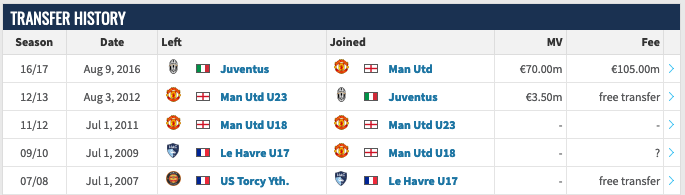

In [71]:
def transfer_history(url):
  soup = soup_maker(url)
  table = soup.find_all('tr',class_='zeile-transfer' )
  transf_hist=[]
  for history in table:
    a1=[]
    a2=history.text.split("\n")
    for item in a2:
      if item !='' and item!= ' ' :
        a1.append(item)
    transf_hist.append(a1)
  return  transf_hist

In [72]:
transfer_history('https://www.transfermarkt.com/paul-pogba/profil/spieler/122153')

[['16/17', 'Aug 9, 2016', 'Juventus', 'Man Utd', '€70.00m', '€105.00m'],
 ['12/13',
  'Aug 3, 2012',
  'Man Utd U23',
  'Juventus',
  '€3.50m',
  'free transfer'],
 ['11/12', 'Jul 1, 2011', 'Man Utd U18', 'Man Utd U23', '-', '-'],
 ['09/10', 'Jul 1, 2009', 'Le Havre U17', 'Man Utd U18', '-', '?'],
 ['07/08',
  'Jul 1, 2007',
  'US Torcy Yth.',
  'Le Havre U17',
  '-',
  'free transfer']]

3. Write a function that combines this work with the ones above so that in this function you create a dataset that contains all Premier Leagu Player's transfer history. Save the dataframe as `premiere_league.csv` under a folder named `data`.

In [78]:
import pandas as pd

In [102]:
def transfer_history_2(url):
  soup = soup_maker(url)
  req_links=team_link_generator(url)
  transf_hist=[]
  b1=req_links.items()
  for item1,item2 in b1:
    soup = soup_maker(url)
    b2=players_link_generator(item2)
    for item3,item4 in b2.items():
      for history in history(item4):
        history.append(item3)
        history.append(item1)
        transf_hist.append(history)
  dataframe=pd.DataFrame(transf_hist,columns=['Season','Date','Left','Joined','MV','Fee','PlayerName','PlayerLink'])
  !mkdir data
  dataframe.to_csv('/content/data/premiere_league.csv', index = False, header=True)
  return dataframe

In [103]:
transfer_history_2("https://www.transfermarkt.com/manchester-united/startseite/verein/985/saison_id/2020")

mkdir: cannot create directory ‘data’: File exists


,Season,Date,Left,Joined,MV,Fee,PlayerName,PlayerLink


# Submit your homework

Please submit your homework on 05-07-2021 by 23:59 to the Google Form below.


[Google Forms](https://forms.gle/Tn3VPFWnw8dyu8PK6)